In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Bank Customer Churn Dataset.csv")

# Aim :"To analyze factors contributing to customer churn at ABC Bank and provide targeted, data-driven insights to inform strategies that reduce churn rates and enhance customer retention."

# About Dataset
<ol>
<li><b>Customer ID</b> - The Unique ID of each individual customer</li>
<li><b>Credit Score</b> - A number depicting the customer’s credithworthiness</li>
<li><b>Country</b> - The country the customer banks from</li>
<li><b>Gender</b> - The gender the customer identifies with</li>
<li><b>Age</b> - Depicts the customers age</li>
<li><b>Tenure</b> - Indicates how length in years the customer has been with the bank</li>
<li><b>Balance</b> - The amount currently available in the customer’s account</li>
<li><b>Products Number</b> - The number of products purchased by the customer through the bank</li>
<li><b>Credit Card</b> - Indicates the customer has a credit card</li>
<li><b>Active Member</b> - Indicates if the customer is an active or inactive</li>
<li><b>Estimated Salary</b> - Bank Estimation of the income of the customer</li>
<li><b>Churn</b> - Indicator of if the customer has left the bank or not</li>
    <li>churn = 1 indicates customers who have churned (left the bank).
churn = 0 indicates customers who have retained (remained with the bank).</li>
<ol>

In [3]:
df = data.copy()

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated().sum()

0

# Columns Distributions

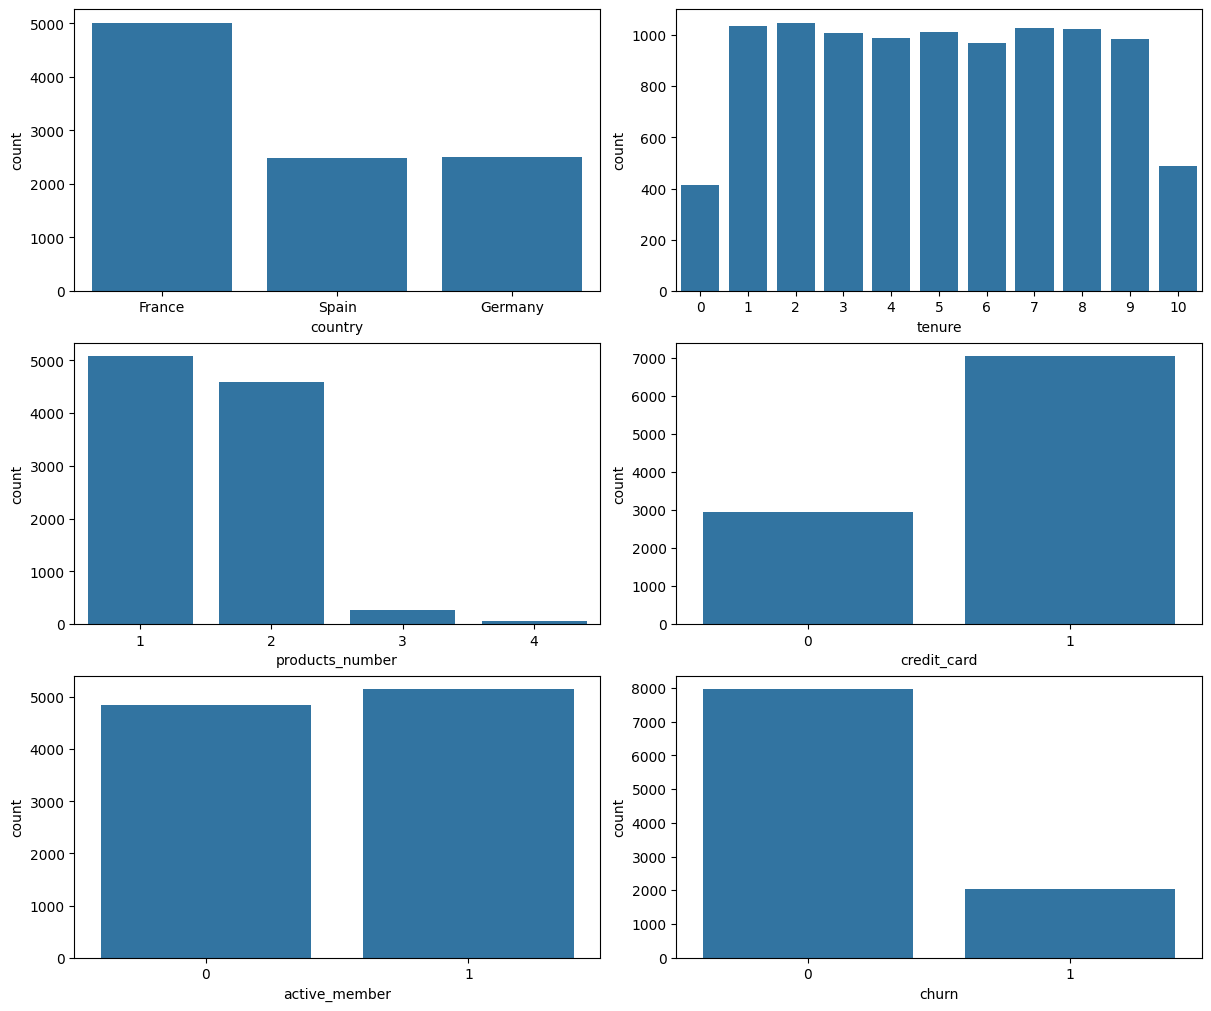

In [8]:
catCol = ["country", "tenure", "products_number", "credit_card", "active_member", "churn"]
fig, axes = plt.subplots(3, 2, constrained_layout=True, figsize=(12, 10))

count = 0
for row in range(3):
    for col in range(2):
        sns.countplot(data=df, x=catCol[count], ax=axes[row, col])
        count += 1
plt.show()

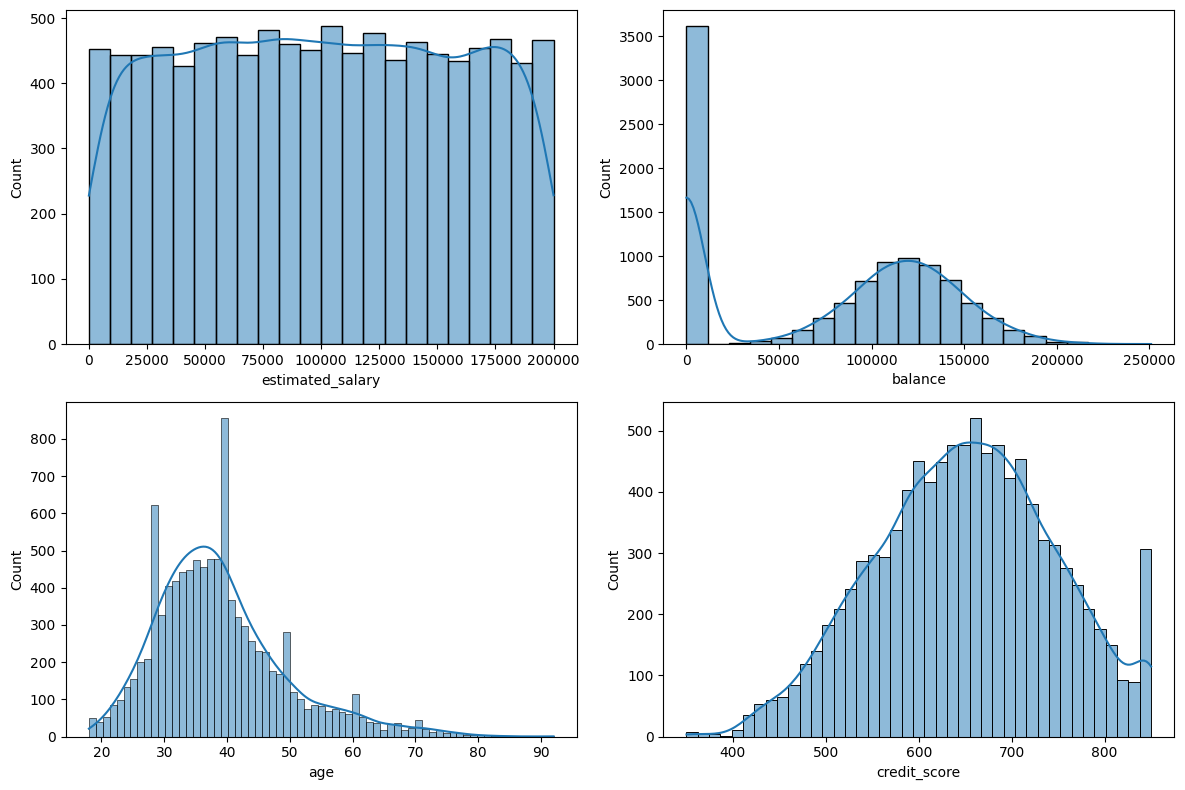

In [9]:
intCol = ["estimated_salary", "balance", "age", "credit_score"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
count = 0
for row in range(2):
    for col in range(2):
        sns.histplot(data=df[intCol[count]], kde=True, ax=axes[row, col])
        count += 1

plt.tight_layout() 
plt.show()

Credit score ranges vary across creditors and score types.
There are many models used to calculate credit score,
but most of the ones published by FICO and VantageScore® have a score range of 300 to 850.
Here I used the FICO score because it's widely recognized as the most authoritative and trusted credit score model used by lenders, 
banks, and financial institutions. It’s built on years of data, research, and industry standards,
making it a reliable metric for assessing customer creditworthiness.

In [10]:
def creditScoreSegmen(data):
    creditScoreLevel = []
    for score in data:
        if score >= 300 and score <= 579:
            creditScoreLevel.append("300-579: Poor")
        elif score >= 580 and score <= 699:
            creditScoreLevel.append("580-699: Fair")
        elif score >= 679 and score <= 739:
            creditScoreLevel.append("679-739: Good")
        elif score >= 740 and score <= 799:
            creditScoreLevel.append("740-799: Very Good")
        elif score >= 800 and score <= 850:
            creditScoreLevel.append("800-850: Exceptional")
    return creditScoreLevel

In [11]:
df["credit_score_level"] = creditScoreSegmen(df["credit_score"])

In [12]:
def salaryLevel(data):
    average = data.mean()
    salary_level = []
    for salary in data:
        if salary == average:
            salary_level.append("Average")
        elif salary > average:
            salary_level.append("High")
        elif salary < average:
            salary_level.append("Low")
    return salary_level

Setting the estimated salary level into low, meduim and high using the quantile range as when divide the data into quantiles each category will have approximately the same number of observations. This is useful because it ensures that it will not just segment based on arbitrary salary thresholds (like average or median salary) but based on how salaries are distributed across all customers.

In [13]:
df['salary_level'] = pd.qcut(df['estimated_salary'], q=3, labels=['Low', 'Medium', 'High'])

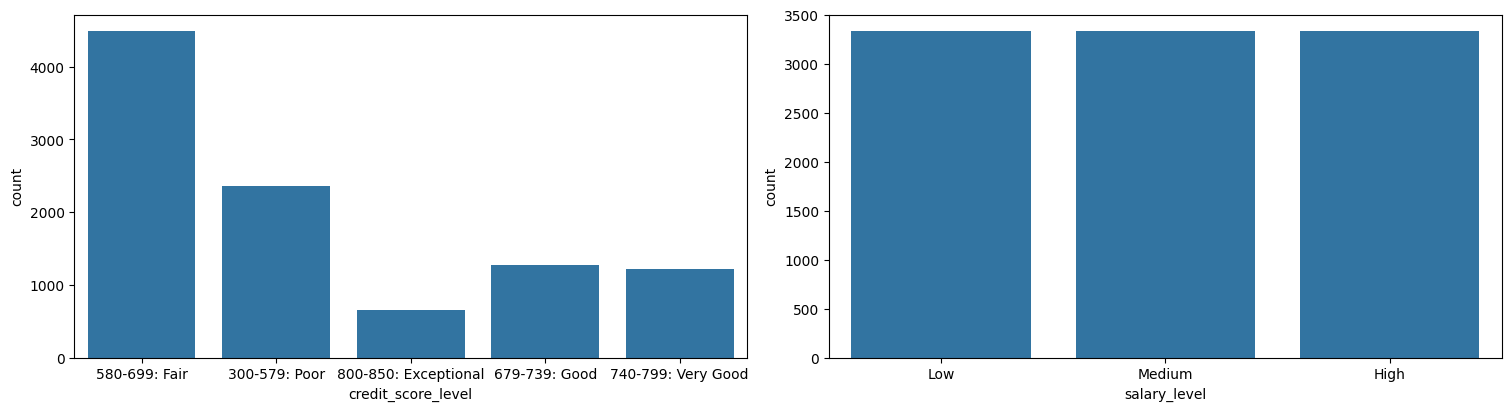

In [14]:
fig, axes  = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 4))
addedCol = ["credit_score_level", "salary_level"]
count = 0
for rowCol in range(2):
    sns.countplot(data=df, x=addedCol[count], ax=axes[rowCol])
    count+= 1

plt.show()

# Data Analysis

### Questions cover

<ol>
    <li>What are the total numbers of active and inactive members based on gender?</li>
    <li>Which from country have the highest churn status?</li>
    <li>What is the age distribution of customers by gender?</li>
    <li>How does the average age of churned and retained customers differ by gender?</li>
    <li>What is the credit score distribution among customers who have churned compared to those who have remained?</li>
    <li>What is the churn status of customers with a credit card?</li>
    <li>What is the distribution of customer tenure based on churn status?</li>
    <li>Is there a correlation between tenure with the bank and churn rate?</li>
    <li>What is the churn rate among specific age groups?</li>
    <li>What is the churn rate among customers with specific credit score ranges?</li>
    <li>How does the estimated salary correlate with churn, and is there a salary threshold where customers are more likely to churn?</li>
    <li>How does the number of products a customer holds relate to churn rates?</li>
    <li>How does age group influence churn rate within different credit score levels?</li>
</ol>

# 1 Demographic and Gender Analysis



### 1.Total numbers of active and inactive members based on the differences between male and female.

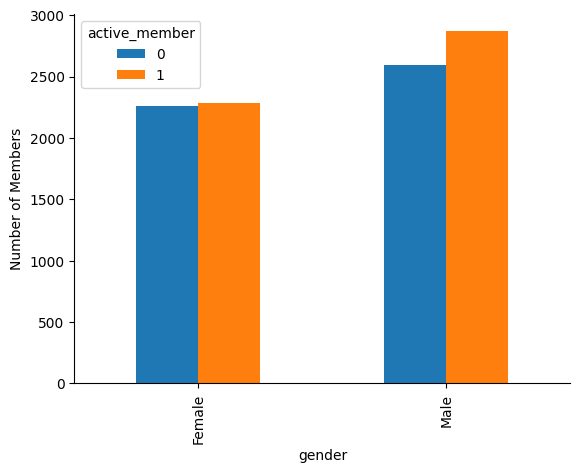

In [15]:
gender_activity = df.groupby(["gender", "active_member"]).size().unstack()

gender_activity.plot(kind="bar")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Number of Members")
plt.show()

In [16]:
gender_activity["genAcRate"] = round((gender_activity[1] /(gender_activity[0] + gender_activity[1])) * 100, 2) 
gender_activity

active_member,0,1,genAcRate
gender,,,
Female,2259,2284,50.28
Male,2590,2867,52.54


From the chart and table, we observe that among male members, there are 2,590 inactive and 2,867 active members, totaling 4,849. In comparison, female members include 2,259 inactive and 2,284 active, totaling 4,543. This shows a slight difference in activity levels, with males having a marginally higher rate of active membership compared to females. This variation in activity rates between genders could provide insight into differing churn patterns and engagement levels among male and female customers.

### 2.Which from country have the highest churn status?

In [17]:
churnCountry = df.groupby(["country", "churn"]).size().unstack()
churnCountry["churn_rate"] = (churnCountry[1] / (churnCountry[1] + churnCountry[0])) * 100
churnCountry

churn,0,1,churn_rate
country,,,
France,4204,810,16.154767
Germany,1695,814,32.443204
Spain,2064,413,16.673395


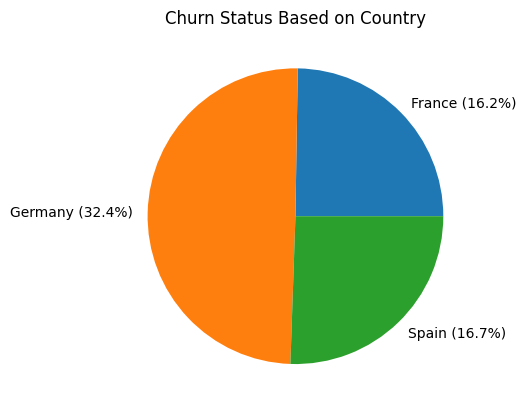

In [18]:
palette_color = sns.color_palette('cool')
labels = [f"{country} ({rate:.1f}%)" for country, rate in zip(churnCountry.index, churnCountry["churn_rate"])]
plt.pie(data=churnCountry, x=churnCountry["churn_rate"], labels=labels,)
plt.title("Churn Status Based on Country")
plt.show()

Germany has the highest churn rate at 32.4%, followed by Spain at 16.7%, and France with the lowest churn rate at 16.2%. This visual representation clearly highlights the disparity in churn rates between the three countries, with Germany experiencing significantly higher customer churn compared to France and Spain.

The significantly higher churn rate in Germany compared to France and Spain indicates a potential issue with customer satisfaction or retention strategies in that market.

Potential Reasons for Germany's High Churn:
<ol>
<li>Strong competition in the German market might be attracting customers away from the company.</li>
<li>Customers in Germany might be experiencing problems with the products or services offered</li>
</ol>

### 3.How does the age distribution of customers vary by gender?

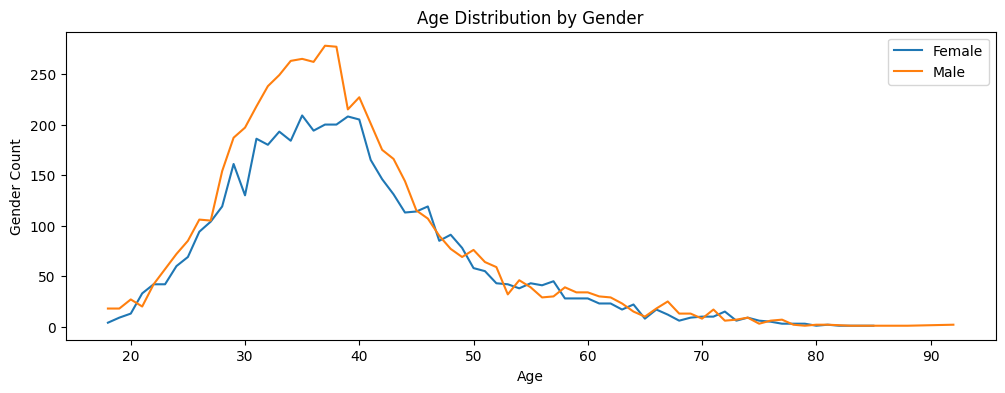

In [19]:
ageActivity = df.groupby(["gender", "age"]).size()
ageActivityTable = ageActivity
plt.figure(figsize=(12, 4))
plt.plot(ageActivity["Female"], label="Female")
plt.plot(ageActivity["Male"], label="Male")

plt.legend()
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Gender Count")
plt.show()

From the chart, we observe that the age distribution is right-skewed, with the median age falling between 35 and 40. Compared to females, males show a broader age range, with the highest age extending above 90, while both genders have a similar minimum age below 20. This suggests a slightly older upper age limit among male members.

In [20]:
# Compute descriptive statistics for each group
female_table = df[df["gender"] == "Female"]["age"].describe()
male_table = df[df["gender"] == "Male"]["age"].describe()
overall_table = df["age"].describe()

# Compute the medians
female_median = df[df["gender"] == "Female"]["age"].median()
male_median = df[df["gender"] == "Male"]["age"].median()
overall_median = df["age"].median()

# Combine the statistics into a single DataFrame
summary_table = pd.DataFrame({
    "Female": female_table,
    "Male": male_table,
    "Overall": overall_table
})

# Add the median row
summary_table.loc["median"] = [female_median, male_median, overall_median]

# Display the combined table
print(summary_table)


             Female         Male       Overall
count   4543.000000  5457.000000  10000.000000
mean      39.238389    38.658237     38.921800
std       10.588588    10.396780     10.487806
min       18.000000    18.000000     18.000000
25%       32.000000    32.000000     32.000000
50%       38.000000    37.000000     37.000000
75%       45.000000    43.000000     44.000000
max       85.000000    92.000000     92.000000
median    38.000000    37.000000     37.000000


### 4.How does the average age of churned and retained customers differ by gender?

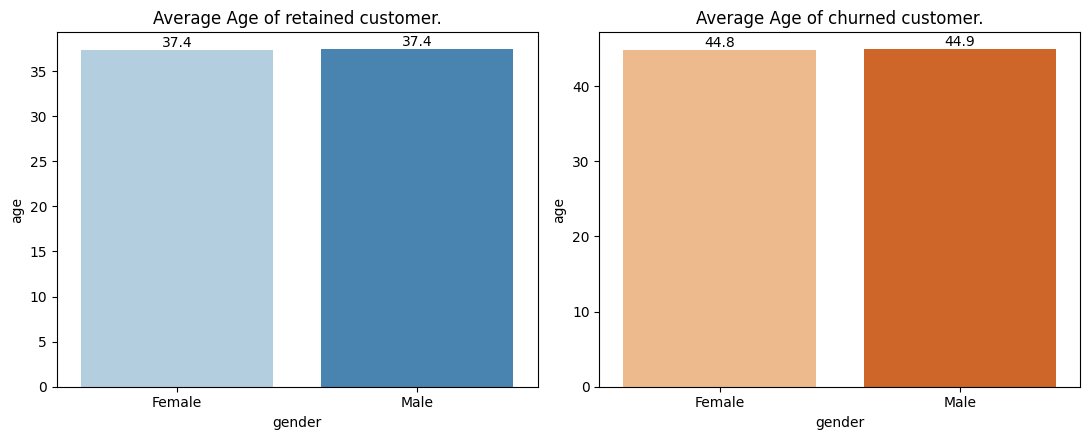

In [21]:
age_by_gender_churn = df.groupby(["churn", "gender"])["age"].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))

ax1 = sns.barplot(data=age_by_gender_churn[age_by_gender_churn["churn"] == 0], 
                  x="gender", hue="gender", y="age", ax=axes[0], palette="Blues")
axes[0].set_title("Average Age of retained customer.")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f", label_type="edge")

ax2 = sns.barplot(data=age_by_gender_churn[age_by_gender_churn["churn"] == 1], 
                  x="gender", hue="gender", y="age", ax=axes[1], palette="Oranges")
axes[1].set_title("Average Age of churned customer.")
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f", label_type="edge")
    
plt.tight_layout()
plt.show()

In [22]:
age_by_gender_churn

,churn,gender,age
0,0,Female,37.382491
1,0,Male,37.427725
2,1,Female,44.784899
3,1,Male,44.905345


From the analysis, we observe that the average age for retained customers is approximately 37.4 years, while the average age for churned customers is 44.8 years, consistent across both male and female customers. This indicates that older customers, regardless of gender, tend to have a higher churn rate compared to younger customers who are more likely to remain with the bank.

This similarity might suggest that other factors, beyond gender, could play a more significant role in influencing churn among different age groups.

# 2. Churn and Customer Characteristics

### 1.Credit scores distribution among customers who have churned compared to those who have remained

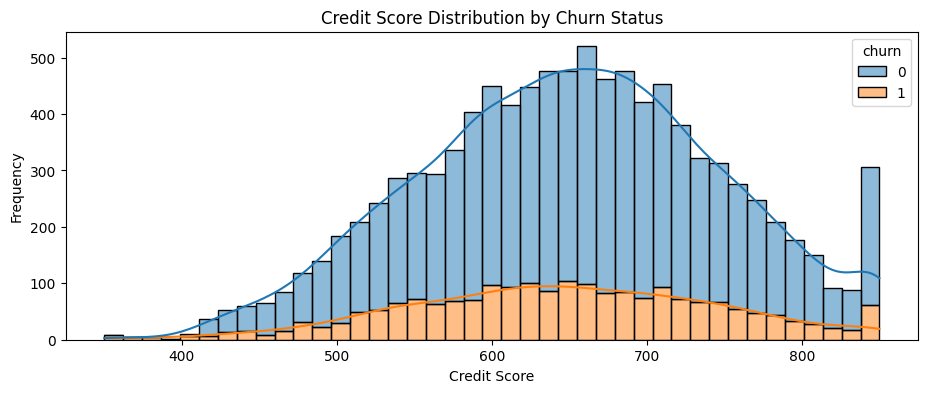

In [23]:
plt.figure(figsize=(11, 4))
sns.histplot(df, x="credit_score", hue="churn", multiple="stack", kde=True)

plt.title("Credit Score Distribution by Churn Status")
plt.ylabel("Frequency")
plt.xlabel("Credit Score")
plt.show()

In [24]:
summary_stats = df.groupby("churn")["credit_score"].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


From the summary table and histogram, we observe that the average mean credit scores for churned and non-churned customers are approximately 645 and 651, respectively. While values like percentiles (25%, 50%, 75%) show little variation between the two groups, there is a noticeable difference at the minimum level, with churned customers having a minimum score 50 points lower than those who remained. Additionally, the histogram indicates that a significant portion of customers, approximately 80%, have remained, while only 20% have churned with the bank.

### 2.What  is the churn status of those who have credit card?

In [25]:
churnCC = df.groupby(["credit_card", "churn"]).size().unstack(level=0)
churnCC["churn_status"] = round((churnCC[1] / (churnCC[1] + churnCC[0])) * 100, 2)
churnCC

credit_card,0,1,churn_status
churn,,,
0,2332,5631,70.71
1,613,1424,69.91


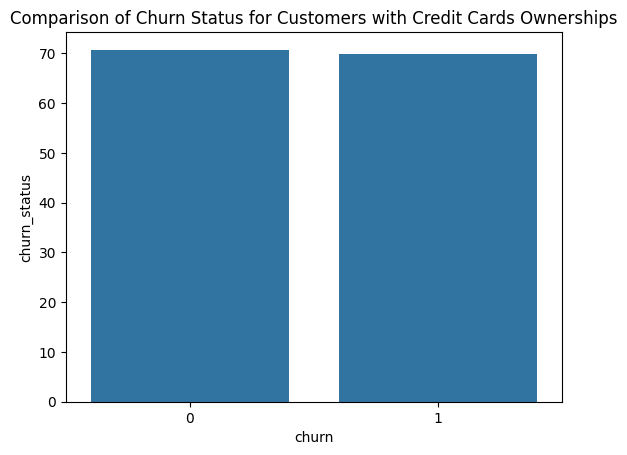

In [26]:

sns.barplot(data=churnCC, x=churnCC.index, y="churn_status")
plt.title("Comparison of Churn Status for Customers with Credit Cards Ownerships")
plt.show()

The churn rate for customers with credit cards (30.09%) is slightly higher than for those without a credit card (29.29%).
This suggests that holding a credit card may not have a significantly positive or negative impact on customer retention. However, this difference is relatively small, meaning other factors could play a more significant role in customer churn.

Although there's a slight increase in churn for customers with a credit card, the difference is not large enough to conclude that credit card ownership is a key driver of churn.
This could mean that the churn behavior may be influenced more by other factors, such as account balance, tenure, or product usage.

### 3.Distribution of customer tenure based on churn status.

In [27]:
tenure_counts = df.groupby(["churn", "tenure"]).size().unstack(level=0).fillna(0)
tenure_counts["churn_rate"] = round((tenure_counts[1] / (tenure_counts[0] + tenure_counts[1])) * 100, 2)
tenure_counts.style.background_gradient(cmap="Blues")

churn,0,1,churn_rate
tenure,,,
0,318,95,23.000000
1,803,232,22.420000
2,847,201,19.180000
3,796,213,21.110000
4,786,203,20.530000
5,803,209,20.650000
6,771,196,20.270000
7,851,177,17.220000
8,828,197,19.220000


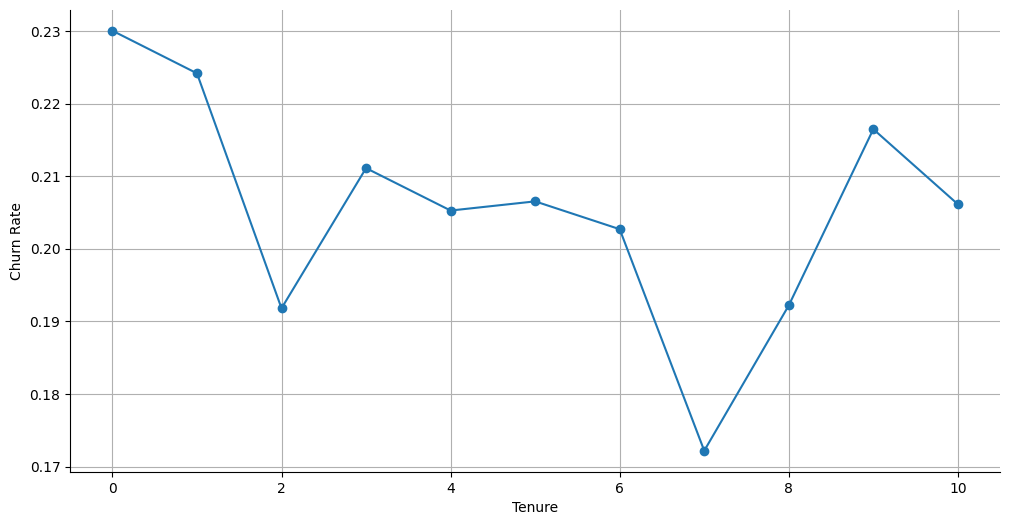

In [28]:
churn_rate = df.groupby('tenure')['churn'].mean()


# Plot churn rate vs. tenure
plt.figure(figsize=(12, 6))
ax = plt.plot(churn_rate.index, churn_rate.values, marker='o', linestyle='-')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.grid()
plt.show()

<ol>
<li>Initial Drop-off: The first couple of years have the highest churn rates, highlighting an opportunity to improve onboarding processes, or address common issues new customers face.</li>
<li>Stable Mid-Tenure: Customers tend to stay with the bank through the mid-tenure years, suggesting satisfaction with services or a stable relationship. Retention efforts can focus on maintaining this satisfaction to keep churn low.</li>
<li>Late-Tenure Increase: There’s a small uptick in churn in later tenure years, suggesting that customers might need new incentives or offerings to keep them engaged with the bank’s products as they become more experienced customers.</li>
</ol>

### 4.Is there a correlation between tenure with the bank and churn rate? 

In [29]:
correlation, p_value = st.spearmanr(df["tenure"], df["churn"])
print(f"Spearman's correlation coefficient: {correlation:.4f} P-Value: {p_value:.4f}")

Spearman's correlation coefficient: -0.0140 P-Value: 0.1622


The negative value of the correlation suggests that, as tenure increases, there is a very slight tendency for customers to churn less. However, the value of this correlation is very small (close to zero), meaning that the relationship is weak.

The p-value is greater than the typical significance level of 0.05. This means that we fail to reject the null hypothesis that there is no correlation between tenure and churn. In other words, the observed correlation is not statistically significant, and cannot confidently conclude that tenure has an effect on churn.

In summary, based on the results, there is no significant correlation between tenure and churn, and the weak negative correlation further supports this lack of relationship.

In [30]:
correlation, p_value = st.spearmanr(df["tenure"], df["churn"])
print(f"Spearman's correlation coefficient: {correlation:.4f}: P-Value: {p_value:.4f}")

Spearman's correlation coefficient: -0.0140: P-Value: 0.1622


### 5. Is there a specific age group that has the highest churn rate?

Dividing the age into groups
<ol>
<li>Young Adults (18-24): Individuals typically in school or early career, potentially low financial stability.</li>
<li>Early Career (25-34): Those beginning careers, building financial habits, and often more mobile.</li>
<li>Mid-Career (35-44): Likely more financially stable with established banking needs.</li>
<li>Established Adults (45-54): People in this group are often at the peak of their earning potential and may be less likely to <li>churn if satisfied.</li>
<li>Pre-Retirement (55-64): This group might focus on savings and stability, making retention important.</li>
<li>Early Retirement (65-74): Many in this stage focus on fixed income and conservative spending.</li>
<li>Late Retirement (75+): Seniors may have different banking needs and could be more loyal to established services.</li>
</ol>

In [31]:
# creating an age group
df["age_group"] = pd.cut(
    df["age"],
    bins=[18, 24, 34, 44, 54, 64, 74, 92],
    labels=["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
)

ageGroupRate = df.groupby(["churn", "age_group"]).size().unstack(level=0)
ageGroupRate["age_group_rate"] = round((ageGroupRate[1] / (ageGroupRate[1] + ageGroupRate[0])) * 100, 2)
ageGroupRate.style.background_gradient(cmap="Blues")

churn,0,1,age_group_rate
age_group,,,
18-24,397,38,8.740000
25-34,2972,250,7.760000
35-44,3278,703,17.660000
45-54,756,702,48.150000
55-64,301,299,49.830000
65-74,186,42,18.420000
75+,53,1,1.850000


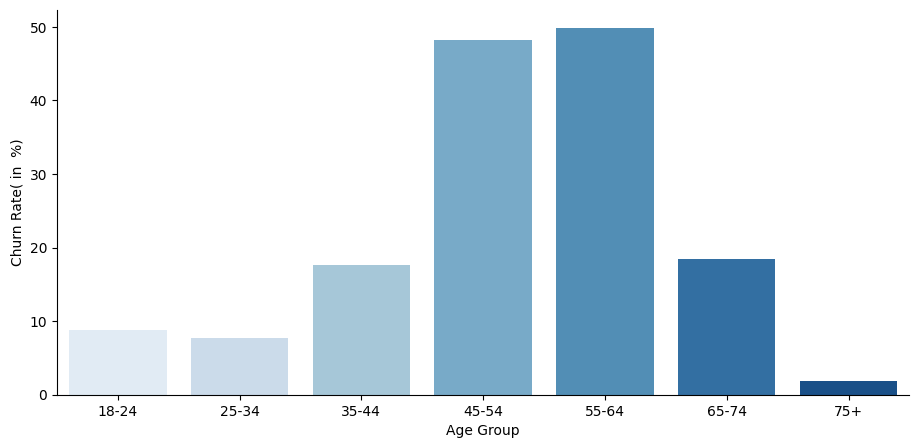

In [32]:
plt.figure(figsize=(11, 5))
ax = sns.barplot(data=ageGroupRate, x=ageGroupRate.index, y=ageGroupRate["age_group_rate"], palette="Blues")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_visible(False)
# for container in ax.containers:
#     ax.bar_label(container, fmt="%.1f", label_type="edge")
    
# ax.yaxis.set_visible(False)

plt.ylabel("Churn Rate( in  %)")
plt.xlabel("Age Group")
# plt.title("Churn rate by age group")
plt.show()

The 55-64 age group has the highest churn rate at 49.83%, closely followed by the 45-54 age group at 48.15%.
This indicates that customers in these two age ranges are significantly more likely to churn compared to other age groups.

The 35-44 age group has a moderate churn rate of 17.66%, while the 65-74 group also shows a notable churn rate of 18.42%.
These rates are lower than the peak rates in the 45-64 range but still higher than those for younger age groups.

Younger customers (18-34) have relatively low churn rates, with 8.74% for the 18-24 group and 7.76% for the 25-34 group.
The 75+ age group has the lowest churn rate at 1.85%, possibly indicating strong retention among older, long-standing customers

Customers in the 45-64 age range exhibit the highest churn rates, suggesting that this group may require targeted retention strategies. In contrast, very young and elderly customers tend to have lower churn rates, possibly due to greater loyalty or satisfaction with the bank's services.

### 6.What is the churn rate among customers with specific credit score ranges

In [33]:
churn_rate_cslevel = df.groupby(["credit_score_level", "churn"]).size().unstack()
churn_rate_cslevel["churn_rate"] = round((churn_rate_cslevel[1] / (churn_rate_cslevel[0] + churn_rate_cslevel[1])) * 100, 2)
churn_rate_cslevel.style.background_gradient(cmap="Blues")

churn,0,1,churn_rate
credit_score_level,,,
300-579: Poor,1842,520,22.020000
580-699: Fair,3597,893,19.890000
679-739: Good,1025,244,19.230000
740-799: Very Good,972,252,20.590000
800-850: Exceptional,527,128,19.540000


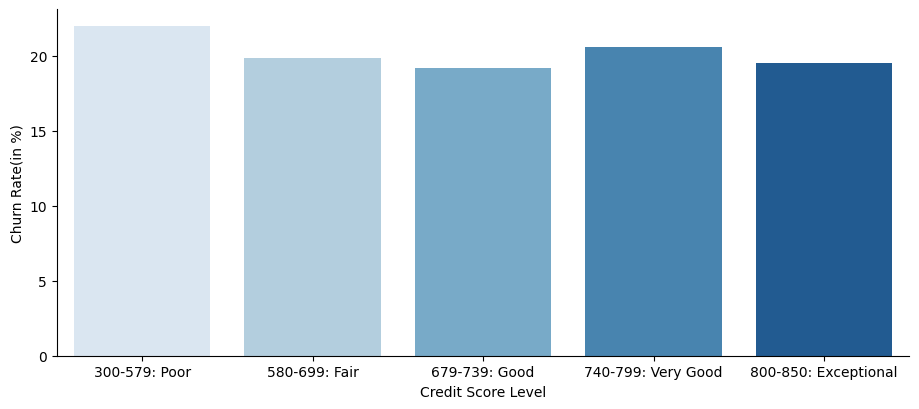

In [34]:
plt.figure(figsize=(11, 4.5))
sns.barplot(data=churn_rate_cslevel,  x=churn_rate_cslevel.index, legend=False, y="churn_rate", palette="Blues")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Churn Rate(in %)")
plt.xlabel("Credit Score Level")
# plt.title("Churn Rate Based on Credit Score Range")
plt.show()

Customers with a 300-579 (Poor) credit score have the highest churn rate at 22.02%.This may suggest that customers with lower credit scores might be more financially vulnerable or less satisfied with bank services, leading to higher churn.

The 740-799 (Very Good) group has a churn rate of 20.59%, slightly lower than the "Poor" group but still above the others.
The 580-699 (Fair) and 800-850 (Exceptional) categories follow with churn rates around 19.89% and 19.54%, respectively.
This indicates that there is still a reasonable churn risk among customers with Fair and Exceptional credit scores, possibly due to competitive options or changing financial needs.

The 679-739 (Good) credit score range has the lowest churn rate at 19.23%, suggesting relatively higher retention within this group.

Customers with Poor credit scores (300-579) have the highest churn rate, suggesting a need for more engagement or support for this group. Meanwhile, customers with Good credit scores (679-739) show the lowest churn rate, indicating greater retention stability in this credit range

### 7.Does the estimated salary correlate with churn, and is there a threshold salary where customers are more likely to churn?

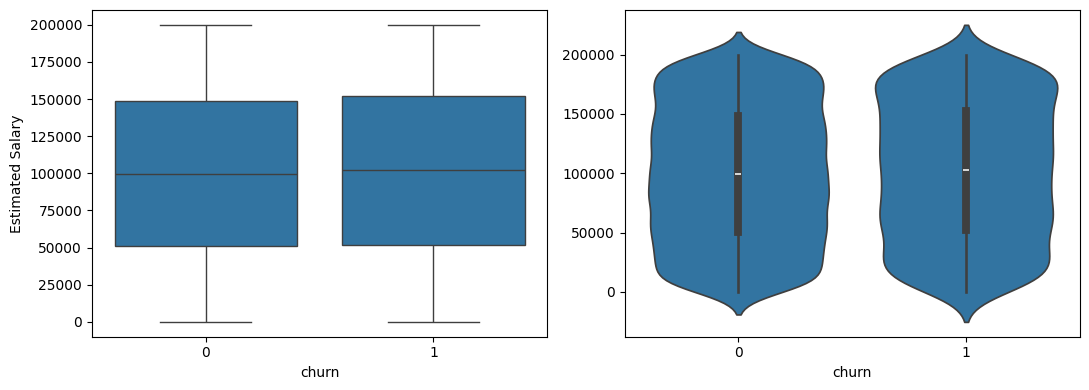

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

pointbiserialr, p_vaue = st.pointbiserialr(df["estimated_salary"], df["churn"])

sns.boxplot(data=df, x="churn", y="estimated_salary", ax=axes[0])
sns.violinplot(data=df, x="churn", y="estimated_salary", ax=axes[1])

axes[1].set_ylabel("")
axes[0].set_ylabel("Estimated Salary")

# axes[0] 

plt.tight_layout()
plt.show()

In [36]:
summaryTable = df.groupby("churn")["estimated_salary"].describe()
summaryTable["Median"] = df.groupby("churn")["estimated_salary"].median()
summaryTable

,count,mean,std,min,25%,50%,75%,max,Median
churn,,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48,99645.04
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10,102460.84


From the chart and table provided, there doesn't seem to be a strong correlation between estimated salary and churn. The distributions of salaries for customers who churn and those who don't are quite similar.

We don't observe a specific salary threshold where customers are more likely to churn. The distributions overlap significantly, indicating that customers with various salary levels churn at similar rates.

lets perform a statistical test.

lets check to see if the the churned and non-chruned data follows a normal distribution, if it doesn't we will use the non-parametric test other wise we will go with parametric test. 

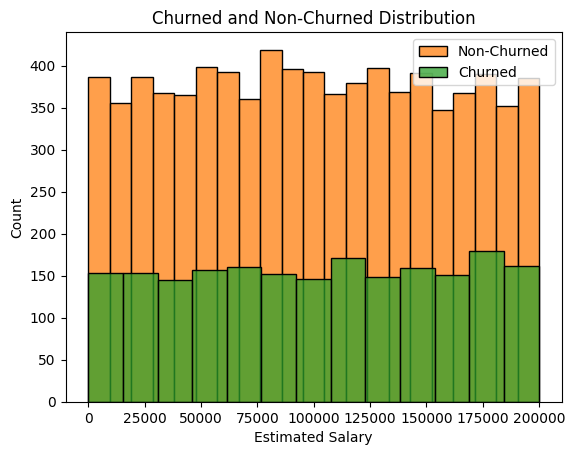

In [37]:
sns.histplot()
sns.histplot(df[df["churn"] == 0]["estimated_salary"], label="Non-Churned")
sns.histplot(df[df["churn"] == 1]["estimated_salary"], label="Churned")
plt.title("Churned and Non-Churned Distribution")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show()

from the chart we we can see it doesn't seem follow a normal distribution, lets use the shapiro wilk test to confirm it

In [38]:
stat, p_value = st.shapiro(df[df["churn"] == 0]["estimated_salary"])
stat, p_value 

(0.9574708342552185, 3.8115318229635024e-43)

In [39]:
stat, p_value = st.shapiro(df[df["churn"] == 1]["estimated_salary"])
stat, p_value 

(0.9530484080314636, 4.592605209157659e-25)

Since the both p-value is smaller than the significance level (0.05), we reject the null hypothesis that the "estimated salary" for non-churned and churned data is normally distributed.

Therefore, based on this test, we conclude that the "estimated salary" of non-churned and churned customers does not follow a normal distribution.

In [40]:
group_churned = df[df["churn"] == 1]["estimated_salary"]
group_non_churned = df[df["churn"] == 0]["estimated_salary"]

# Perform the Mann-Whitney U test
stat, p_value = st.mannwhitneyu(group_churned, group_non_churned, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {stat}, P-Value: {p_value}")

Mann-Whitney U Test Statistic: 8250768.0, P-Value: 0.22705150930153783


The p-value 0.2271 is greater than the commonly used significance level of 0.05, indicating that there is no statistically significant difference in the distribution of "estimated salary" between customers who churned and those who did not. 

This suggests that estimated salary is not significantly associated with customer churn.

### What is the distribution of the number of products used by customers?

In [41]:
noOfProduct = df.groupby("products_number").size()
tabelpro = noOfProduct.to_frame() 
tabelpro = tabelpro.rename(columns={0: "Number of Customers"})
tabelpro["Proportion"] = round((tabelpro["Number of Customers"] / len(df)) * 100, 2)
tabelpro.style.background_gradient(cmap="Blues")

,Number of Customers,Proportion
products_number,,
1,5084,50.840000
2,4590,45.900000
3,266,2.660000
4,60,0.600000


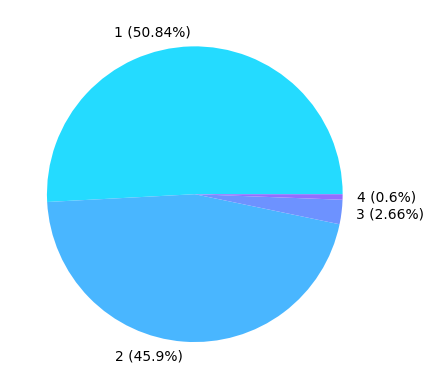

In [42]:
productLabels = [f"{productNumber} ({proportion}%)" for productNumber, proportion in zip(noOfProduct.index, tabelpro["Proportion"])]
plt.pie(data=noOfProduct, labels=productLabels, x=noOfProduct.values, colors=sns.color_palette('cool'))
plt.show()

### 8.How does the number of products a customer holds relate to churn rates?

In [43]:
productChurn = df.groupby([ "products_number", "churn"]).size().unstack()
productChurn["churn_rate"] = (productChurn[1] / (productChurn[0] + productChurn[1])) * 100
productChurn.fillna(0, inplace=True)
productChurn.style.background_gradient(cmap="Blues")

churn,0,1,churn_rate
products_number,,,
1,3675.000000,1409.000000,27.714398
2,4242.000000,348.000000,7.581699
3,46.000000,220.000000,82.706767
4,0.000000,60.000000,0.000000


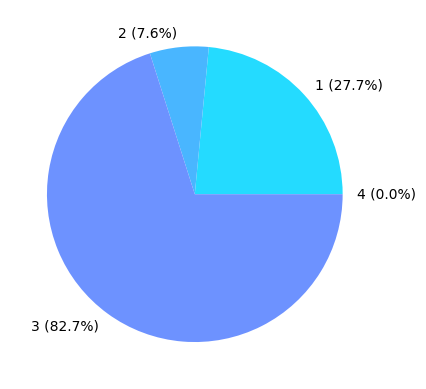

In [44]:
palette_color = sns.color_palette('cool')
labels = [f"{productNumber} ({rate:.1f}%)" for productNumber, rate in zip(productChurn.index, productChurn["churn_rate"])]
plt.pie(data=productChurn, x="churn_rate", labels=labels, colors=palette_color)
plt.show()

In [45]:
productChurn.style.background_gradient(cmap="Blues")

churn,0,1,churn_rate
products_number,,,
1,3675.000000,1409.000000,27.714398
2,4242.000000,348.000000,7.581699
3,46.000000,220.000000,82.706767
4,0.000000,60.000000,0.000000


The data suggests a U-shaped pattern in churn rates: churn is higher for single-product and three-product customers, while it’s lower for two- and four-product customers.
<ol>
<li>Low engagement (single-product customers) might lead to a higher risk of churn due to limited interaction with the bank.</li>
<li>Medium engagement (two products) appears to be a "sweet spot," where customers are more engaged but not overwhelmed, leading to low churn.</li>
<li>High engagement (four products) shows strong loyalty, with no churn observed.</li>
<li>Possible dissatisfaction or threshold with three products may lead to higher churn, suggesting that certain customers may not find value in adding a third product.</li>
</ol>

### 9.How does age group influence churn rate within different credit score levels?

In [46]:
churnRateAgeScore = df.groupby(["credit_score_level", "age_group"])["churn"].mean().unstack(level=0)
churnRateAgeScore.style.background_gradient(cmap="Blues")

credit_score_level,300-579: Poor,580-699: Fair,679-739: Good,740-799: Very Good,800-850: Exceptional
age_group,,,,,
18-24,0.071429,0.098446,0.107692,0.034483,0.142857
25-34,0.074454,0.077793,0.072319,0.100737,0.054299
35-44,0.189599,0.181215,0.162376,0.153209,0.169231
45-54,0.543956,0.440184,0.474227,0.500000,0.511628
55-64,0.486111,0.472924,0.446154,0.626667,0.564103
65-74,0.250000,0.150943,0.192308,0.225806,0.142857
75+,0.125000,0.000000,0.000000,0.000000,0.000000


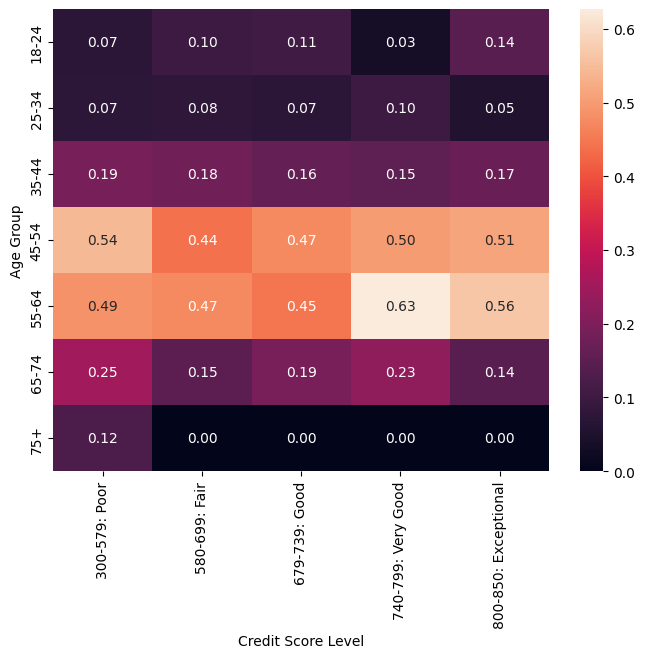

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(churnRateAgeScore, annot=True, fmt=".2f", cbar=True)
plt.xlabel("Credit Score Level")
plt.ylabel("Age Group")
# plt.title("Churn Rate Variation by Credit Score and Age Group")
plt.show()

Younger Age Groups(18-34) churn rates seem to be relatively low across all credit score levels, suggesting that younger customers are less likely to churn regardless of their credit score.

Middle-Aged Groups(35-54) churn rates tend to be higher in this age group, especially for those with lower credit scores. This could be due to various reasons like financial stress, changes in life circumstances, or dissatisfaction with the service.

Older Age Groups(55+) churn rates show a mixed pattern. While they are generally lower for higher credit scores, there are spikes in some specific age-credit score combinations. This might be due to factors like retirement, fixed incomes, or health concerns.

# Summary and Recommendation

## Summary
<ol>
    <li>Germany has the highest churn rate (32.4%), indicating potential dissatisfaction or strong competition.</li>
    <li>Customers aged 45–64 exhibit the highest churn rates (~48-50%), while younger (18-34) and older (75+) customers show the lowest churn rates(<10%). </li>
     <li>Single Product Churn: Customers with only one product have a high churn rate (~27.7%).</li>
    <li>Three Products: A spike in churn (82.7%) suggests dissatisfaction or lack of value in this category.</li>
    <li>Early Years: High churn in the first 1-2 years (~22-23%), indicating onboarding issues.</li>
    <li>Late Tenure: Slight churn increase (~21.7%) in later years suggests a need for loyalty incentives.</li>
    <li>Customers with lower credit scores (300–579) churn the most (22.02%).</li>
</ol>
 